In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 781 kB/s 
     |████████████████████████████████| 6.4 MB 22.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from keras.models import load_model
import yfinance as yf
yf.pdr_override()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.svm import SVR

In [2]:
# Set up End and Start times for data grab
end = "2020-12-30"
start ="2018-01-01"

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'NFLX', 'AMZN']
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
stock_list = [AAPL, GOOG, NFLX, AMZN]
stock_name = ["APPLE", "GOOGLE", "NETFLIX", "AMAZON",]

for stock, com_name in zip(stock_list, stock_name):
    stock["stock_name"] = com_name
    
df = pd.concat(stock_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,stock_name
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075405,102223600,APPLE
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068253,118071600,APPLE
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259007,89738400,APPLE
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728752,94640000,APPLE
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573765,82271200,APPLE
...,...,...,...,...,...,...,...
2020-12-22,3202.840088,3222.000000,3180.080078,3206.520020,3206.520020,2369400,AMAZON
2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800,AMAZON
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,AMAZON


In [3]:
#Check Data
df.isnull().sum()

NameError: name 'df' is not defined

In [8]:
df.isna().any()

Open          False
High          False
Low           False
Close         False
Adj Close     False
Volume        False
stock_name    False
dtype: bool

In [9]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,64.715590,65.502619,63.973070,64.774042,63.386317,1.353838e+08
std,25.530466,25.926881,25.051341,25.509339,25.655103,6.112212e+07
min,35.994999,36.430000,35.500000,35.547501,34.414242,4.544800e+07
25%,46.520626,46.866874,46.174999,46.516875,44.832860,9.309570e+07
50%,54.039999,54.740000,53.270000,53.868752,52.152163,1.210796e+08
75%,76.709999,77.858747,76.005001,77.342503,76.021801,1.614616e+08
max,138.050003,138.789993,134.339996,136.690002,135.480591,4.265100e+08


In [10]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2018-01-02 to 2020-12-29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        754 non-null    float64
 1   High        754 non-null    float64
 2   Low         754 non-null    float64
 3   Close       754 non-null    float64
 4   Adj Close   754 non-null    float64
 5   Volume      754 non-null    int64  
 6   stock_name  754 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.1+ KB


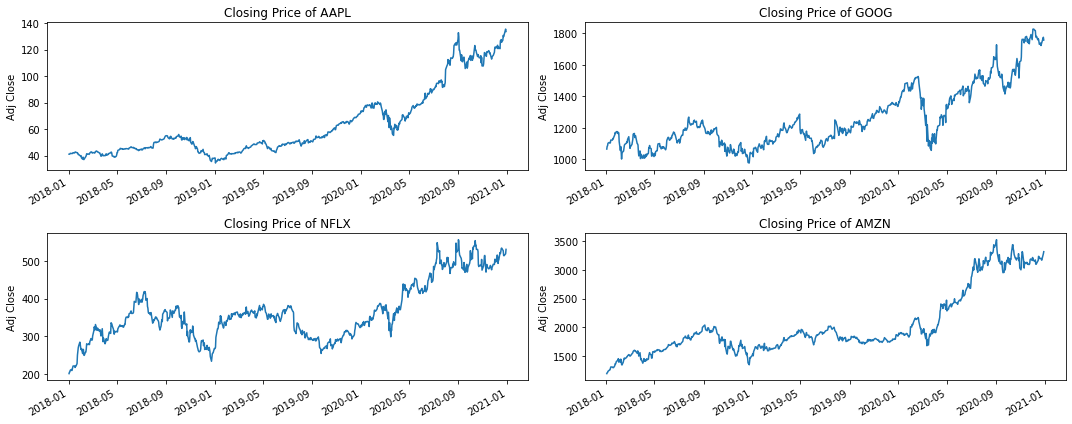

In [11]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

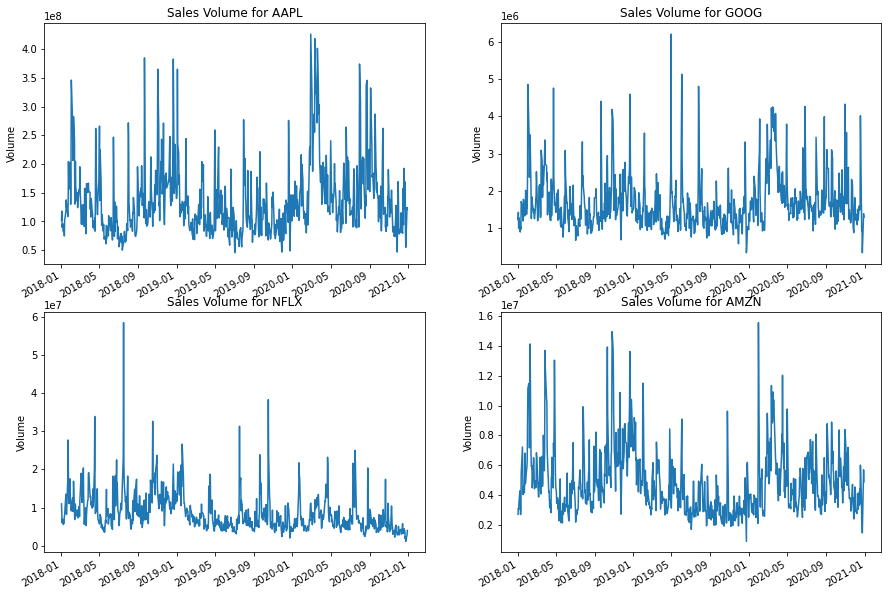

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.show()

In [13]:
#2. What was the moving average of the various stocks?
#moving average of the various stocks
ma_day = [10, 20, 50]
for ma in ma_day:
    for stock in stock_list:
        column_name = f"MA for {ma} days"
        stock[column_name] = stock['Adj Close'].rolling(ma).mean()

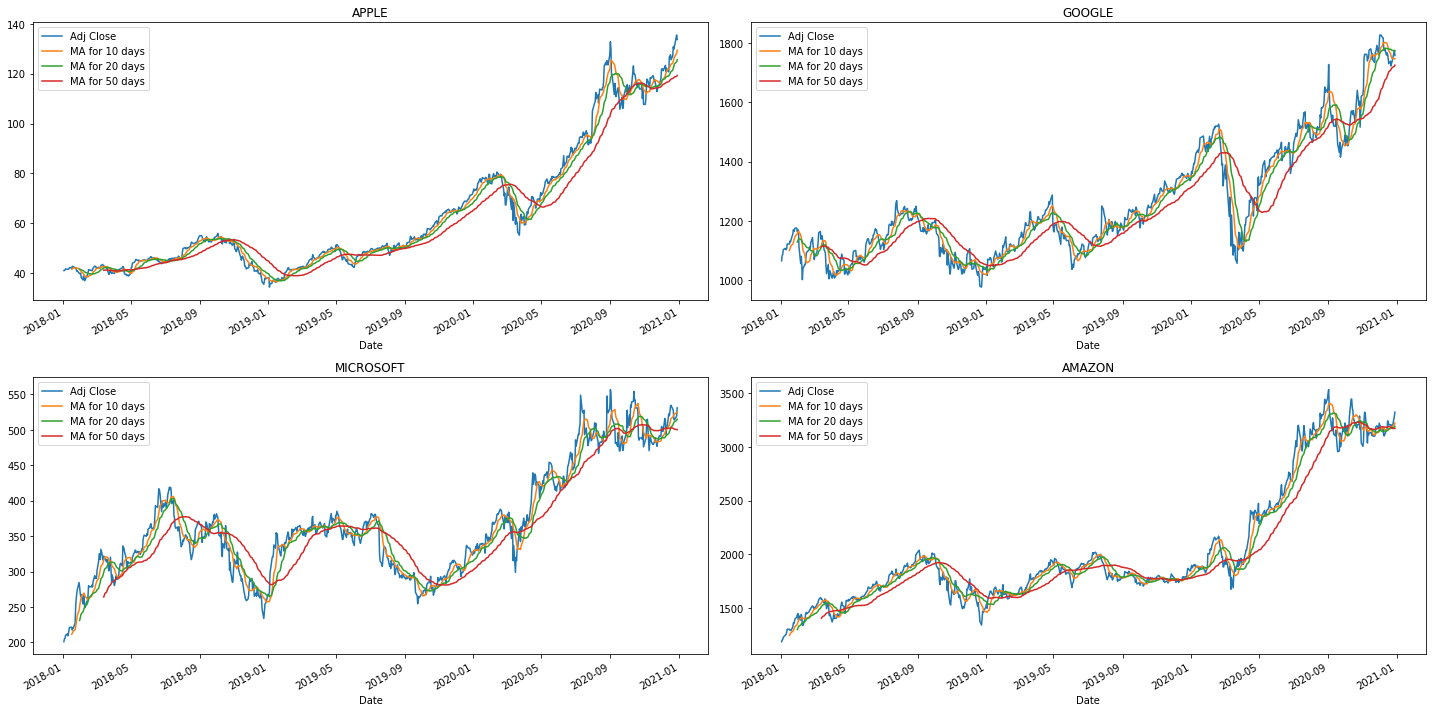

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [16]:
df = pdr.get_data_yahoo(tech_list, start=start, end=end)

[*********************100%***********************]  4 of 4 completed


In [17]:
df

Adj Close                                             Close  \
                  AAPL         AMZN         GOOG        NFLX        AAPL   
Date                                                                       
2018-01-02   41.075409  1189.010010  1065.000000  201.070007   43.064999   
2018-01-03   41.068249  1204.199951  1082.479980  205.050003   43.057499   
2018-01-04   41.258999  1209.589966  1086.400024  205.630005   43.257500   
2018-01-05   41.728756  1229.140015  1102.229980  209.990005   43.750000   
2018-01-08   41.573769  1246.869995  1106.939941  212.050003   43.587502   
...                ...          ...          ...         ...         ...   
2020-12-22  130.713135  3206.520020  1723.500000  527.330017  131.880005   
2020-12-23  129.801285  3185.270020  1732.380005  514.479980  130.960007   
2020-12-24  130.802322  3172.689941  1738.849976  513.969971  131.970001   
2020-12-28  135.480576  3283.959961  1776.089966  519.119995  136.690002   
2020-12-29  133.676666  3322.000000  1758.719971  530.869995  134.869995   

                                                        High               \
                   AMZN         GOOG        NFLX        AAPL         AMZN   
Date                                                                        
2018-01-02  1189.010010  1065.000000  201.070007   43.075001  1190.000000   
2018-01-03  1204.199951  1082.479980  205.050003   43.637501  1205.489990   
2018-01-04  1209.589966  1086.400024  205.630005   43.367500  1215.869995   
2018-01-05  1229.140015  1102.229980  209.990005   43.842499  1229.140015   
2018-01-08  1246.869995  1106.939941  212.050003   43.902500  1253.079956   
...                 ...          ...         ...         ...          ...   
2020-12-22  3206.520020  1723.500000  527.330017  134.410004  3222.000000   
2020-12-23  3185.270020  1732.380005  514.479980  132.429993  3210.129883   
2020-12-24  3172.689941  1738.849976  513.969971  133.460007  3202.000000   
2020-12-28  3283.959961  1776.089966  519.119995  137.339996  3304.000000   
2020-12-29  3322.000000  1758.719971  530.869995  138.789993  3350.649902   

            ...          Low                    Open               \
            ...         GOOG        NFLX        AAPL         AMZN   
Date        ...                                                     
2018-01-02  ...  1045.229980  195.419998   42.540001  1172.000000   
2018-01-03  ...  1063.209961  201.500000   43.132500  1188.300049   
2018-01-04  ...  1084.001953  204.000000   43.134998  1205.000000   
2018-01-05  ...  1092.000000  205.589996   43.360001  1217.510010   
2018-01-08  ...  1101.619995  208.440002   43.587502  1236.000000   
...         ...          ...         ...         ...          ...   
2020-12-22  ...  1712.574951  520.500000  131.610001  3202.840088   
2020-12-23  ...  1725.040039  514.200012  132.160004  3205.000000   
2020-12-24  ...  1729.109985  512.210022  131.320007  3193.899902   
2020-12-28  ...  1746.334961  507.130005  133.990005  3194.000000   
2020-12-29  ...  1756.089966  515.479980  138.050003  3309.939941   

                                        Volume                              
                   GOOG        NFLX       AAPL     AMZN     GOOG      NFLX  
Date                                                                        
2018-01-02  1048.339966  196.100006  102223600  2694500  1237600  10966900  
2018-01-03  1064.310059  202.050003  118071600  3108800  1430200   8591400  
2018-01-04  1088.000000  206.199997   89738400  3022100  1004600   6029600  
2018-01-05  1094.000000  207.250000   94640000  3544700  1279100   7033200  
2018-01-08  1102.229980  210.020004   82271200  4279500  1047600   5580200  
...                 ...         ...        ...      ...      ...       ...  
2020-12-22  1734.430054  527.690002  168904800  2369400   936700   1906600  
2020-12-23  1728.109985  524.760010   88223700  2093800  1033800   2393200  
2020-12-24  1735.000000  515.119995   54930100  1451900

In [18]:
df = df["Adj Close"]
df

,AAPL,AMZN,GOOG,NFLX
Date,,,,
2018-01-02,41.075409,1189.010010,1065.000000,201.070007
2018-01-03,41.068249,1204.199951,1082.479980,205.050003
2018-01-04,41.258999,1209.589966,1086.400024,205.630005
2018-01-05,41.728756,1229.140015,1102.229980,209.990005
2018-01-08,41.573769,1246.869995,1106.939941,212.050003
...,...,...,...,...
2020-12-22,130.713135,3206.520020,1723.500000,527.330017
2020-12-23,129.801285,3185.270020,1732.380005,514.479980
2020-12-24,130.802322,3172.689941,1738.849976,513.969971


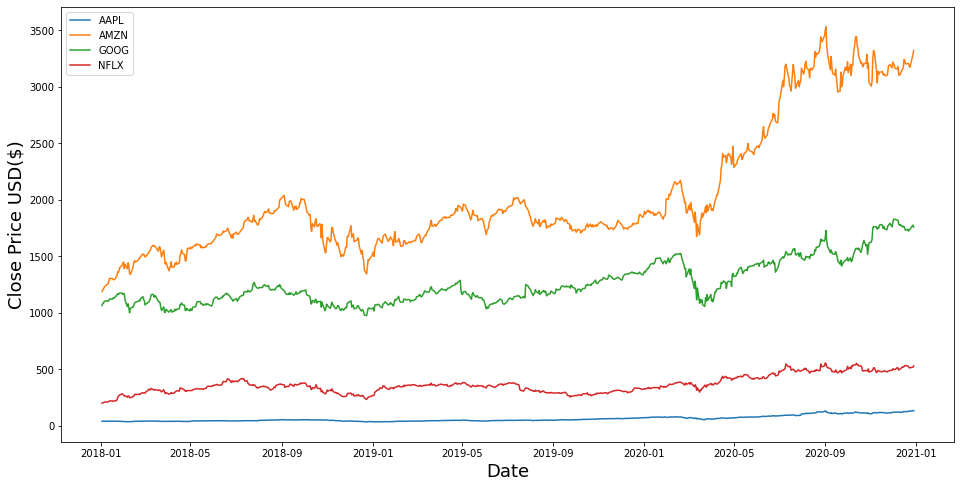

In [19]:
my_stocks=df
plt.figure(figsize=(16,8))
#Loop through each stock and plot the price
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [20]:
#Calculate the simple returns
my_stocks = df
daily_simple_returns=my_stocks.pct_change(1)
daily_simple_returns.dropna()

,AAPL,AMZN,GOOG,NFLX
Date,,,,
2018-01-03,-0.000174,0.012775,0.016413,0.019794
2018-01-04,0.004645,0.004476,0.003621,0.002829
2018-01-05,0.011386,0.016163,0.014571,0.021203
2018-01-08,-0.003714,0.014425,0.004273,0.009810
2018-01-09,-0.000115,0.004676,-0.000614,-0.012922
...,...,...,...,...
2020-12-22,0.028464,0.000106,-0.009124,-0.002987
2020-12-23,-0.006976,-0.006627,0.005152,-0.024368
2020-12-24,0.007712,-0.003949,0.003735,-0.000991


In [21]:
#Show the stock correlation
corr=daily_simple_returns.corr()
corr

,AAPL,AMZN,GOOG,NFLX
AAPL,1.000000,0.655103,0.694943,0.507702
AMZN,0.655103,1.000000,0.685708,0.671134
GOOG,0.694943,0.685708,1.000000,0.545803
NFLX,0.507702,0.671134,0.545803,1.000000


<AxesSubplot:>

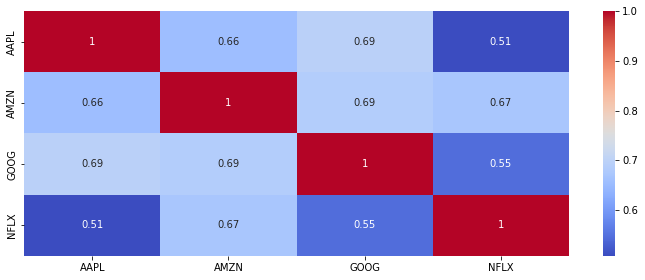

In [22]:
plt.figure(figsize=(12.2,4.5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [23]:
#Show The covariance matrix for simple returns
cov=daily_simple_returns.cov()
cov

,AAPL,AMZN,GOOG,NFLX
AAPL,0.000490,0.000304,0.000299,0.000302
AMZN,0.000304,0.000439,0.000279,0.000378
GOOG,0.000299,0.000279,0.000377,0.000285
NFLX,0.000302,0.000378,0.000285,0.000723


<AxesSubplot:>

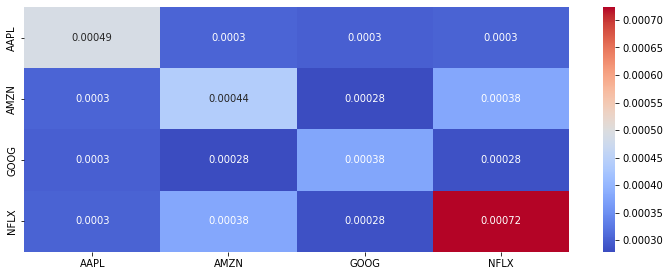

In [24]:
plt.figure(figsize=(12.2,4.5))
sns.heatmap(cov, annot=True, cmap='coolwarm')

In [25]:
#Show the variance
var=daily_simple_returns.var()
var


AAPL    0.000490
AMZN    0.000439
GOOG    0.000377
NFLX    0.000723
dtype: float64

In [26]:
#Print the standard deviation for daily simple returns
std = daily_simple_returns.std()
std

AAPL    0.022136
AMZN    0.020942
GOOG    0.019406
NFLX    0.026893
dtype: float64

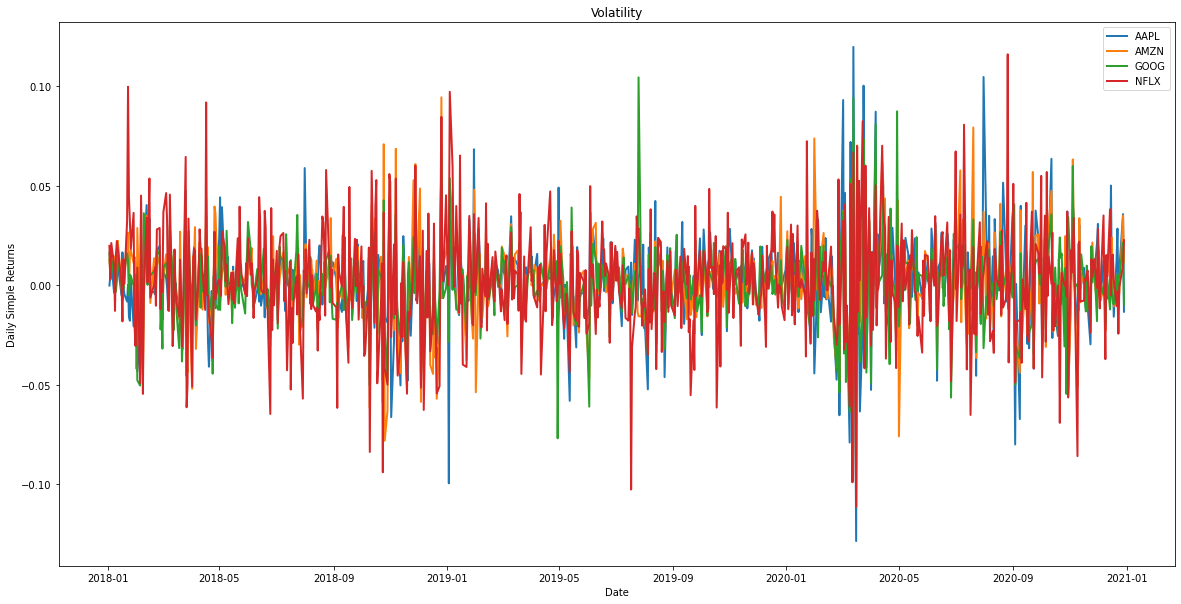

In [27]:
#Visualize the stocks daily simple returns/Volatility
plt.figure(figsize=(20,10))
#Loop through each stock and plot the simple returns
for i in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[i],lw=2,label=i)
plt.legend(loc='upper right',fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

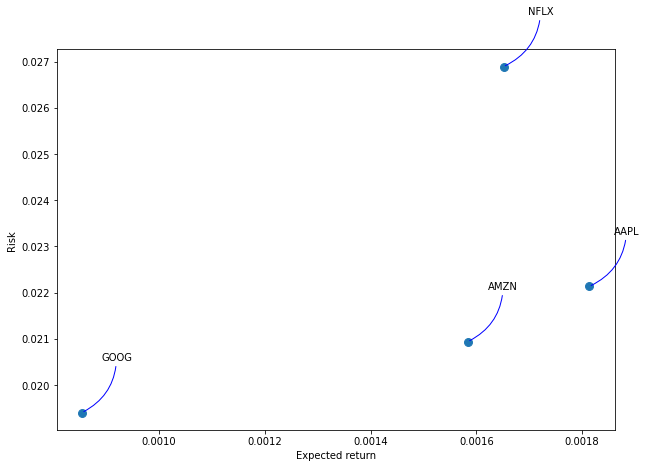

In [28]:
#Risk and daily mean simple return
rets = daily_simple_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.show()

[*********************100%***********************]  1 of 1 completed


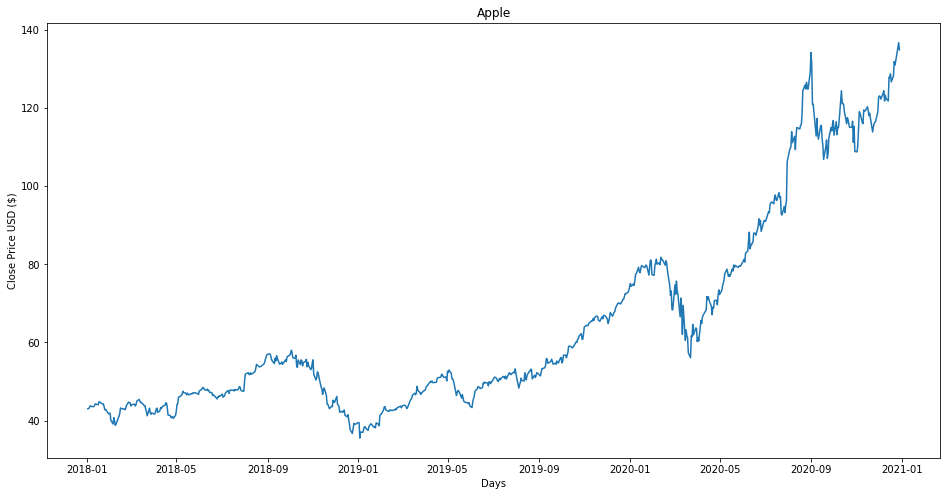

In [6]:
#Decision Tree
stock_selected = pdr.get_data_yahoo("AAPL", start=start, end=end)

# stock_selected.dropna()
stock_selected.shape
# Visualizing the close prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_selected['Close'])
plt.show()
stock_selected = stock_selected["Close"]
stock_selected = pd.DataFrame(stock_selected)

In [13]:
stock_selected

,Close,Prediction
Date,,
2018-01-02,43.064999,41.945000
2018-01-03,43.057499,41.669998
2018-01-04,43.257500,42.097500
2018-01-05,43.750000,42.902500
2018-01-08,43.587502,43.200001
...,...,...
2020-12-22,131.880005,NaN
2020-12-23,130.960007,NaN
2020-12-24,131.970001,NaN


In [7]:
# Prediction 100 days into the future.
future_days = 60
#Create new column Prediction
stock_selected['Prediction'] = stock_selected.shift(-future_days)
#Show Data
# stock_selected = stock_selected.dropna()
stock_selected

,Close,Prediction
Date,,
2018-01-02,43.064999,41.945000
2018-01-03,43.057499,41.669998
2018-01-04,43.257500,42.097500
2018-01-05,43.750000,42.902500
2018-01-08,43.587502,43.200001
...,...,...
2020-12-22,131.880005,NaN
2020-12-23,130.960007,NaN
2020-12-24,131.970001,NaN


In [8]:
#Create the independent data set(X)
x = np.array(stock_selected.drop(['Prediction'], 1))[:-future_days]
y = np.array(stock_selected['Prediction'])[:-future_days]

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_1964\2211477447.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(stock_selected.drop(['Prediction'], 1))[:-future_days]


In [9]:
#Split the data in to 80% training data set and a 20% testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
#Use RandomForestRegressor for the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=2,random_state=587)
forest.fit(x_train,y_train)
print(forest.score(x_test,y_test))

0.7810150003413715


In [11]:
#Show how close predicted values and the actual values are
forest_prediction = forest.predict(x_test)
#Show result predicts
print(forest_prediction)

[ 46.90750122 121.4149971   52.47874832  56.25499916  46.84000015
  45.3275013  131.88000488  81.47124863  40.58000183  51.38249969
  50.80374908  92.61499786  41.89625168  45.26250076  47.14500046
 123.75        50.375       52.78750038 114.60749817  78.73999786
  84.71500015  52.78750038  48.19874954  80.68874741  50.94250107
  96.47499847  47.38500023  42.27500153  43.26874924  67.09249878
  59.05250168  80.68874741  87.89749908  54.58250046  92.06999969
  48.71375084 114.97000122  43.88999939  42.35749817  65.81624985
  68.86500168  51.8125      43.63000107  59.10250092  50.01625061
  84.93500137  78.75250244  71.27750015  39.20500183  87.23750305
 106.83999634  55.77500153  46.52999878  49.80624962  55.41374969
  45.3275013  117.68499756  58.01750183 109.375       95.91999817
  48.95499992  44.95999908  41.89625168  51.38249969  53.25999832
 117.15000153  44.74124908  44.73041725  42.91875076  87.93250275
  56.36375046  52.78750038  46.46500015  71.33499908  84.93500137
  45.32750

In [12]:
#Show actual values
print(y_test)

[ 44.57500076 115.31999969  56.60250092  38.32500076  47.97000122
  51.79000092 118.69000244  81.08499908  47.14749908  52.58750153
  42.73249817  95.47750092  69.93499756  46.63249969  42.90250015
 123.23999786  55.54750061  56.99750137 115.70749664  66.99749756
  77.37750244  56.81499863  51.15250015  78.26249695  58.59249878
 118.27500153  56.75749969  44.24499893  48.38249969 124.37000275
  66.07250214  80.00749969  35.54750061  55.32500076  75.93499756
  50.15499878 121.09999847  46.375       53.31499863  54.97249985
  72.44999695  53.86500168  43.55749893  66.57250214  50.02500153
  85.74749756  77.85250092  79.5625      37.68249893  63.57249832
 107.12000275  42.72249985  47.86000061  51.13249969  54.43249893
  49.80749893 119.38999939  53.61249924 111.11250305  56.09249878
  46.43000031  44.72499847  69.96499634  43.28749847  42.73500061
 115.75        43.88249969  47.18500137  66.39499664  84.69999695
  63.95500183  48.54750061  39.43999863  73.23000336  77.23750305
  47.11750

In [14]:
#Get the validate data for the model
#Create a variable to store all of the rows in the data set except the last n rows
temp_stock_select = stock_selected[:-future_days]
#Create a variable to store the independent price value
# x_future = temp_stock_select.tail(future_days)['Close']
x_future = list()
for vl in  temp_stock_select.tail(future_days)['Close']:
    x_future.append([vl])

In [15]:
x_future

[[95.91999816894531],
 [95.47750091552734],
 [97.05750274658203],
 [97.7249984741211],
 [96.52249908447266],
 [96.32749938964844],
 [98.35749816894531],
 [97.0],
 [97.27249908447266],
 [92.84500122070312],
 [92.61499786376953],
 [94.80999755859375],
 [93.25250244140625],
 [95.04000091552734],
 [96.19000244140625],
 [106.26000213623047],
 [108.9375],
 [109.66500091552734],
 [110.0625],
 [113.90249633789062],
 [111.11250305175781],
 [112.72750091552734],
 [109.375],
 [113.01000213623047],
 [115.01000213623047],
 [114.90750122070312],
 [114.60749816894531],
 [115.5625],
 [115.7074966430664],
 [118.2750015258789],
 [124.37000274658203],
 [125.85749816894531],
 [124.82499694824219],
 [126.52249908447266],
 [125.01000213623047],
 [124.80750274658203],
 [129.0399932861328],
 [134.17999267578125],
 [131.39999389648438],
 [120.87999725341797],
 [120.95999908447266],
 [112.81999969482422],
 [117.31999969482422],
 [113.48999786376953],
 [112.0],
 [115.36000061035156],
 [115.54000091552734],
 [112

In [16]:
forest_prediction = forest.predict(x_future)
#Print the price for the next n days
print('Price of AAPL in ',future_days,'days in predicted to be', forest_prediction)


Price of AAPL in  60 days in predicted to be [113.01999664 113.16000366 118.13500214 114.97000122 119.72000122
 119.72000122 114.97000122 121.19000244 118.13500214 119.01999664
 117.5        117.15000153 116.34000015 117.15000153 115.04000092
 115.05000305 116.59999847 114.94999695 121.4149971  126.60500336
 108.76999664 117.09500122 114.94999695 121.38999939 131.88000488
 131.88000488 115.97000122 119.48999786 125.59000015 122.94000244
 117.07500076 117.68499756 118.02999878 117.68499756 117.68499756
 115.93999863 115.87999725 116.30999756 115.87999725 120.99500275
 120.99500275 117.09500122 122.94000244 126.60500336 123.75
 124.37999725 120.63499832 123.75       118.32499695 128.69999695
 121.4149971  125.77999878 128.69999695 116.59999847 123.75
 131.88000488 123.46500397 125.59000015 122.94000244 121.38999939]


In [17]:
#Print the actual price for the next n days
print('Actual price of AAPL in ',future_days,'days to be', temp_stock_select.tail(future_days)['Prediction'].head(10))

Actual price of AAPL in  60 days to be Date
2020-07-10    116.500000
2020-07-13    113.160004
2020-07-14    115.080002
2020-07-15    114.970001
2020-07-16    116.970001
2020-07-17    124.400002
2020-07-20    121.099998
2020-07-21    121.190002
2020-07-22    120.709999
2020-07-23    119.019997
Name: Prediction, dtype: float64


C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_1964\3133560815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


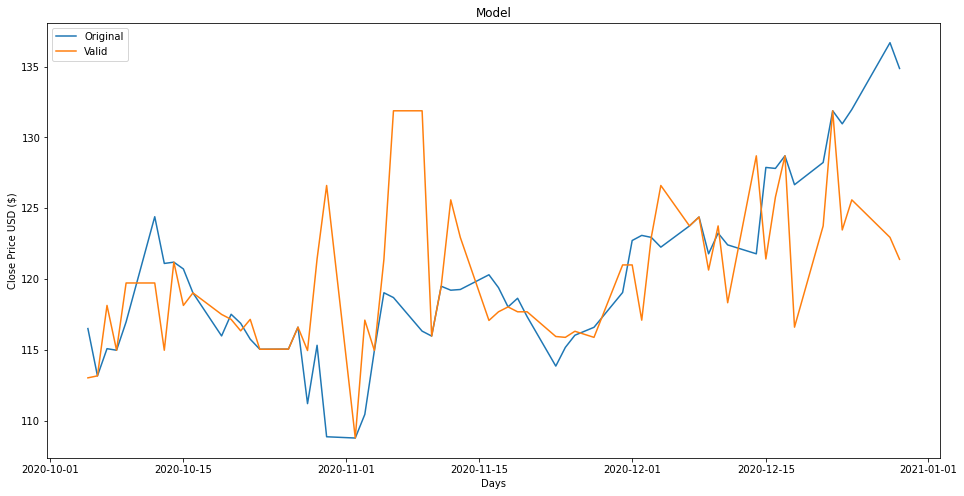

In [18]:
#Show plot Forest
predictions = forest_prediction 
valid = stock_selected[x.shape[0]:]
valid['Predictions'] = predictions
tree_fig = plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
# plt.plot(x_train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [45]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

x_future = stock_selected.drop(['Prediction'], 1)[:-future_days]

x_future = x_future.tail(future_days)

ValueError: Found array with dim 3. DecisionTreeRegressor expected <= 2.

In [47]:
print(lr.coef_)

[1.11898616]


In [20]:
#Predict Tree
tree_prediction = tree.predict(x_future)
tree_prediction


c:\Users\Huu Tai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([116.5       , 113.16000366, 115.08000183, 114.97000122,
       116.97000122, 124.40000153, 114.97000122, 121.19000244,
       120.70999908, 119.01999664, 115.98000336, 117.51000214,
       116.87000275, 117.51000214, 115.04000092, 115.05000305,
       116.59999847, 114.94999695, 127.87999725, 108.86000061,
       108.76999664, 110.44000244, 114.94999695, 119.02999878,
       131.88000488, 131.88000488, 115.97000122, 119.48999786,
       119.20999908, 122.94000244, 120.30000305, 118.63999939,
       118.02999878, 118.63999939, 117.33999634, 113.84999847,
       115.16999817, 116.02999878, 116.58999634, 119.05000305,
       119.05000305, 123.08000183, 122.94000244, 122.25      ,
       123.75      , 124.37999725, 121.77999878, 123.75      ,
       122.41000366, 128.69999695, 127.87999725, 127.80999756,
       128.69999695, 126.66000366, 128.22999573, 131.88000488,
       130.96000671, 131.97000122, 136.69000244, 119.02999878])

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_1964\4259787603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


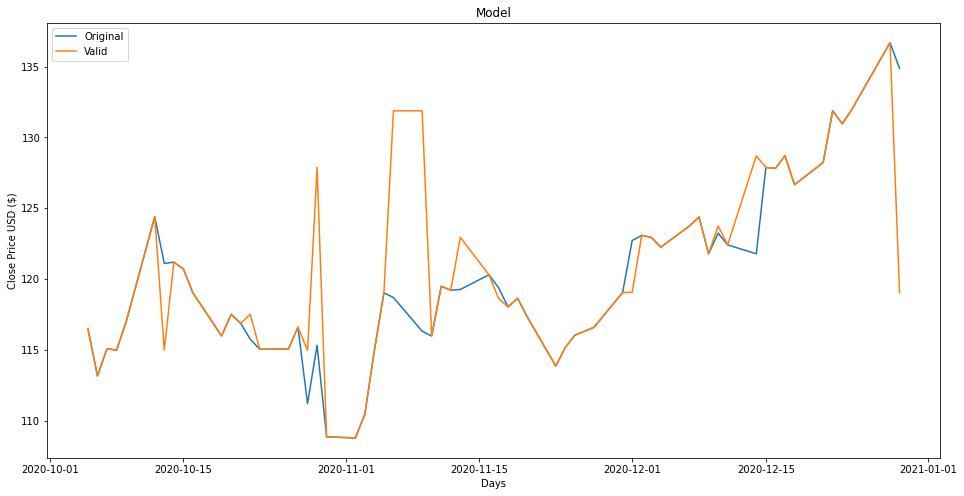

In [21]:
#Show plot
predictions = tree_prediction 
valid = stock_selected[x.shape[0]:]
valid['Predictions'] = predictions
tree_fig = plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
# plt.plot(stock_selected['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [22]:
#Predict Linear
lr_prediction = lr.predict(x_future)
lr_prediction

c:\Users\Huu Tai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([106.83354413, 106.33839583, 108.10639601, 108.85331449,
       107.50773431, 107.28953236, 109.56107289, 108.04205123,
       108.34697393, 103.39266511, 103.13529454, 105.59146881,
       103.84865334, 105.84883939, 107.13567517, 118.40386544,
       121.39994848, 122.21401194, 122.65880791, 126.95571066,
       123.83374679, 125.64090705, 121.88950493, 125.957022  ,
       128.19499432, 128.08029721, 127.74459795, 128.81323178,
       128.97548101, 131.84848344, 138.66870543, 140.33319222,
       139.17783765, 141.07731904, 139.38485589, 139.15826188,
       143.8943602 , 149.64594837, 146.53516822, 134.7634376 ,
       134.85295854, 125.7444119 , 130.77984961, 126.49413058,
       124.82684359, 128.58663776, 128.78805561, 124.97230872,
       122.96932247, 119.05287092, 122.67839222, 124.61423349,
       119.36619422, 120.59707728, 125.14015835, 128.13904159,
       127.16552056, 129.09017812, 130.18678831, 125.96820572])

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_1964\2990437300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


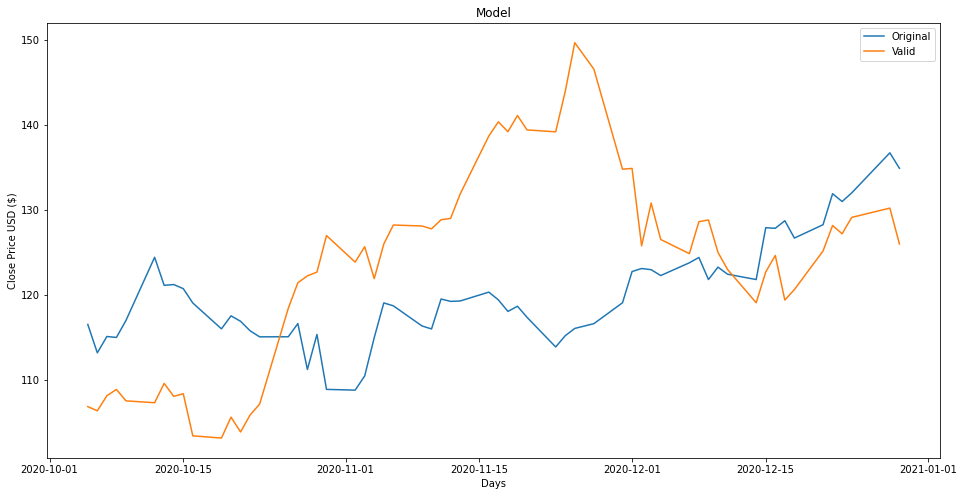

In [23]:
#Show plot linear
predictions = lr_prediction 
valid = stock_selected[x.shape[0]:]
valid['Predictions'] = predictions
linear_fig = plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
# plt.plot(stock_selected['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [24]:
stock_selected2 =  pdr.get_data_yahoo('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [25]:
 # Create a new dataframe with only the 'Close column 
data = stock_selected2.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [26]:
dataset

array([[ 43.06499863],
       [ 43.05749893],
       [ 43.25749969],
       [ 43.75      ],
       [ 43.58750153],
       [ 43.58250046],
       [ 43.57249832],
       [ 43.81999969],
       [ 44.27249908],
       [ 44.04750061],
       [ 44.77500153],
       [ 44.81499863],
       [ 44.61500168],
       [ 44.25      ],
       [ 44.25999832],
       [ 43.55500031],
       [ 42.77750015],
       [ 42.87749863],
       [ 41.99000168],
       [ 41.74250031],
       [ 41.85749817],
       [ 41.94499969],
       [ 40.125     ],
       [ 39.12250137],
       [ 40.75749969],
       [ 39.88499832],
       [ 38.78749847],
       [ 39.10250092],
       [ 40.67750168],
       [ 41.08499908],
       [ 41.84249878],
       [ 43.24750137],
       [ 43.10749817],
       [ 42.96250153],
       [ 42.76750183],
       [ 43.125     ],
       [ 43.875     ],
       [ 44.74250031],
       [ 44.59749985],
       [ 44.52999878],
       [ 43.75      ],
       [ 44.05250168],
       [ 44.20500183],
       [ 44

In [27]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8 ))
training_data_len

604

In [28]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.07432581],
       [0.07425166],
       [0.07622907],
       [0.08109844],
       [0.07949181],
       [0.07944237],
       [0.07934348],
       [0.08179053],
       [0.08626441],
       [0.08403984],
       [0.09123267],
       [0.09162813],
       [0.08965075],
       [0.08604196],
       [0.08614082],
       [0.07917047],
       [0.0714833 ],
       [0.07247199],
       [0.06369727],
       [0.06125021],
       [0.0623872 ],
       [0.06325233],
       [0.04525792],
       [0.03534618],
       [0.05151147],
       [0.04288502],
       [0.03203399],
       [0.03514843],
       [0.05072053],
       [0.05474947],
       [0.0622389 ],
       [0.07613022],
       [0.074746  ],
       [0.07331241],
       [0.07138444],
       [0.07491904],
       [0.08233432],
       [0.09091133],
       [0.08947771],
       [0.08881032],
       [0.08109844],
       [0.08408929],
       [0.08559706],
       [0.08522628],
       [0.08117259],
       [0.08589366],
       [0.0934078 ],
       [0.097

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.07432581, 0.07425166, 0.07622907, 0.08109844, 0.07949181,
       0.07944237, 0.07934348, 0.08179053, 0.08626441, 0.08403984,
       0.09123267, 0.09162813, 0.08965075, 0.08604196, 0.08614082,
       0.07917047, 0.0714833 , 0.07247199, 0.06369727, 0.06125021,
       0.0623872 , 0.06325233, 0.04525792, 0.03534618, 0.05151147,
       0.04288502, 0.03203399, 0.03514843, 0.05072053, 0.05474947,
       0.0622389 , 0.07613022, 0.074746  , 0.07331241, 0.07138444,
       0.07491904, 0.08233432, 0.09091133, 0.08947771, 0.08881032,
       0.08109844, 0.08408929, 0.08559706, 0.08522628, 0.08117259,
       0.08589366, 0.0934078 , 0.09770867, 0.09338309, 0.0896013 ,
       0.09012035, 0.08856317, 0.08183998, 0.08169168, 0.07187879,
       0.06589713, 0.05623254, 0.07558643, 0.06463651, 0.06003904])]
[0.06325233179577505]

[array([0.07432581, 0.07425166, 0.07622907, 0.08109844, 0.07949181,
       0.07944237, 0.07934348, 0.08179053, 0.08626441, 0.08403984,
       0.09123267, 0.09162813, 0.08

In [30]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(544, 60, 1)

In [32]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

544/544 [==============================] - 14s 20ms/step - loss: 0.0017


In [34]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [35]:
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [36]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 14ms/step


In [37]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.768115767185344

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_1964\2998120794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


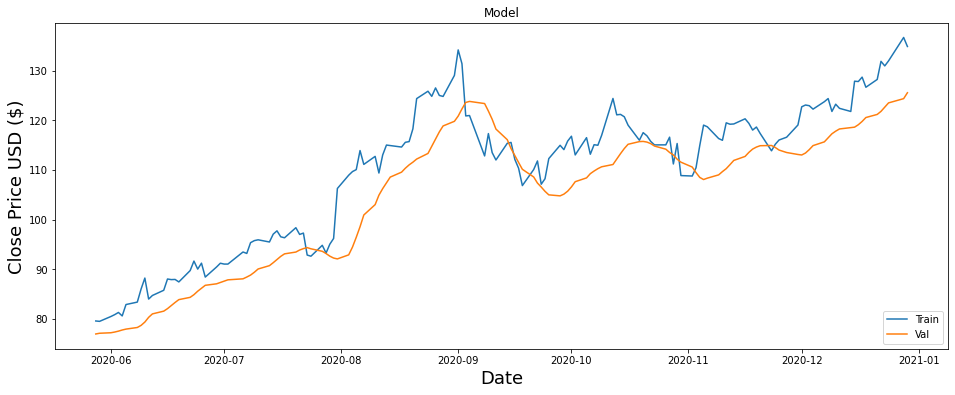

In [38]:
# Plot the data LSTM Model
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
#Predict Value using LSTM Model
valid

,Close,Predictions
Date,,
2020-05-28,79.562500,80.502258
2020-05-29,79.485001,80.625526
2020-06-01,80.462502,80.703247
2020-06-02,80.834999,80.824402
2020-06-03,81.279999,80.995010
...,...,...
2020-12-22,131.880005,127.188148
2020-12-23,130.960007,128.098480
2020-12-24,131.970001,129.005646


In [41]:
#Predct using SVR
days = list()
close_prices = list()
user_input_2 ='AAPL'
df2 = pdr.get_data_yahoo(user_input_2, start=start, end=end)
#Show data from 01-30 month 12 2020
df2


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075405,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068253,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259010,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728760,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573761,82271200
...,...,...,...,...,...,...
2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713120,168904800
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802338,54930100


In [42]:
#Show the data set
df2.head()
df2.tail()
#Get 100 days
df_train = df2.tail(100)
df_test = df_train.tail(1)
df_train = df_train.head(99)
df2 = df2.reset_index()
df_train = df_train.reset_index()
df_test = df_test.reset_index()


In [43]:
df2.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume
654,2020-08-07,113.205002,113.675003,110.292503,111.112503,109.939720,198045600
655,2020-08-10,112.599998,113.775002,110.000000,112.727501,111.537674,212403600
656,2020-08-11,111.970001,112.482498,109.107498,109.375000,108.220535,187902400
657,2020-08-12,110.497498,113.275002,110.297501,113.010002,111.817192,165598000
658,2020-08-13,114.430000,116.042503,113.927498,115.010002,113.796074,210082000
...,...,...,...,...,...,...,...
749,2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713120,168904800
750,2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
751,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802338,54930100
752,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480606,124486200


In [44]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-07,113.205002,113.675003,110.292503,111.112503,109.939720,198045600
1,2020-08-10,112.599998,113.775002,110.000000,112.727501,111.537674,212403600
2,2020-08-11,111.970001,112.482498,109.107498,109.375000,108.220535,187902400
3,2020-08-12,110.497498,113.275002,110.297501,113.010002,111.817192,165598000
4,2020-08-13,114.430000,116.042503,113.927498,115.010002,113.796074,210082000
...,...,...,...,...,...,...,...
94,2020-12-21,125.019997,128.309998,123.449997,128.229996,127.095421,121251600
95,2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713120,168904800
96,2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
97,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802338,54930100


In [45]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676666,121047300


In [46]:
days = list()             
close_prices = list()

#Get only the dates and the adjusted close prices
df_days = df_train.loc[:, 'Date']
df_close = df_train.loc[:, 'Close']

In [47]:
#Create the independent data set (days)
for i in range(len(df_days)):
  days.append([i+1])
#Create the dependent data set (adj close prices)
for close_price in df_close:
  close_prices.append(float(close_price))

In [48]:
#Create 3 models linear, poly, rbf
from sklearn.svm import SVR
lin_svr = SVR(kernel='linear', C= 1000.0)
lin_svr.fit(days, close_prices)

poly_svr = SVR(kernel='poly', C= 1000.0, degree=2)
poly_svr.fit(days, close_prices)

rbf_svr = SVR(kernel='rbf', C= 1000.0, gamma=0.85)
rbf_svr.fit(days, close_prices)

SVR(C=1000.0, gamma=0.85)

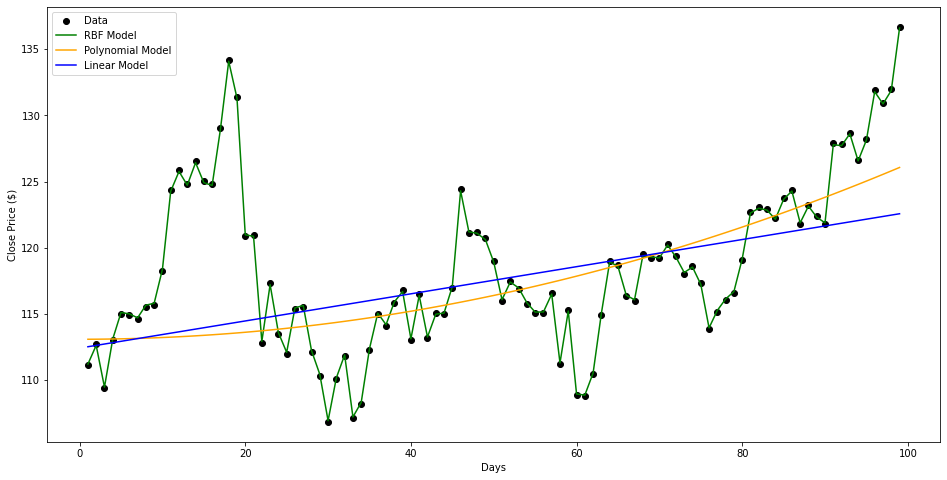

In [49]:
#Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

In [50]:
arr_days_predict = list()
number_days_input = 1
for i in range(number_days_input):
  arr_days_predict.append([i+1+len(days)])

In [51]:
arr_days_predict

[[100]]

In [52]:
for vl in df_test["Close"]:
  print(vl)

134.8699951171875


In [53]:
for vl in rbf_svr.predict(arr_days_predict):
  print(vl)


125.72439621396211


In [54]:
for vl in lin_svr.predict(arr_days_predict):
  print(vl)

122.6687842413121


In [55]:
for vl in poly_svr.predict(arr_days_predict):
  print(vl)

126.32371298863572
